In [5]:

#X, y = shap.datasets.california()
X = df[:,:14]
Y = df[:,15]



InvalidIndexError: (slice(None, None, None), slice(None, 14, None))

[07:51:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[07:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


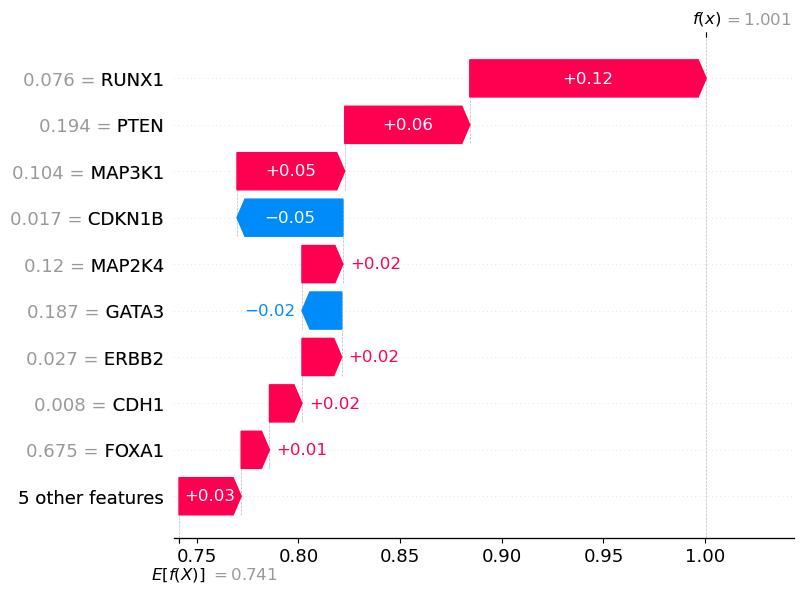

In [1]:
import xgboost
import shap

# train an XGBoost model
import pandas as pd

# Read the CSV file
df = pd.read_csv("Downloads/14_importance_GE.csv")
X = df.iloc[:,:14]
y=df.iloc[:,14:15]

model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [2]:
pip install xgboost

[08:28:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


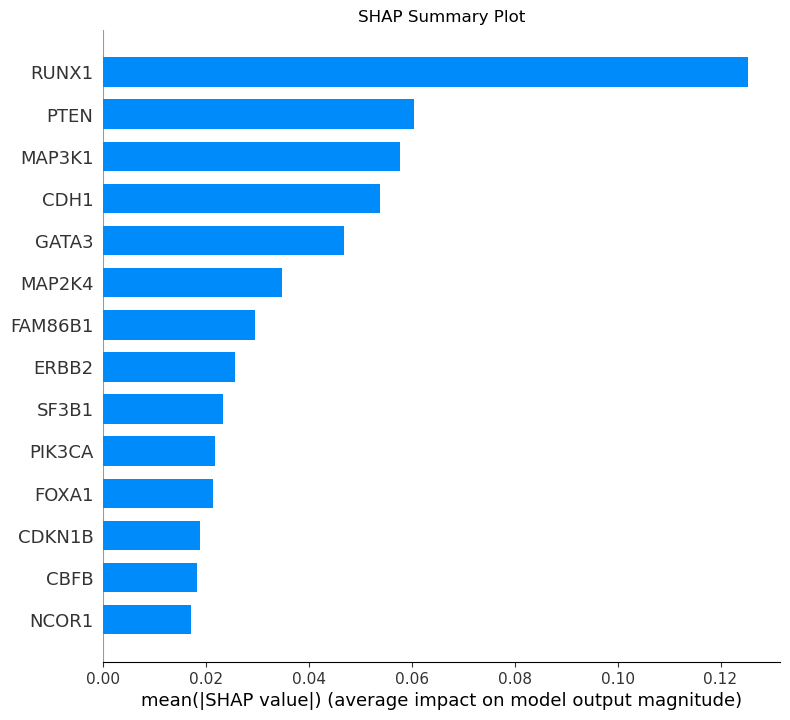

In [8]:
import shap
import pandas as pd
import xgboost
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("Downloads/14_importance_GE.csv")
X = df.iloc[:, :14]
y = df.iloc[:, 14:15]

model = xgboost.XGBRegressor().fit(X, y)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualize the summary plot
shap.summary_plot(shap_values, X, plot_type='bar', color_bar=False, show=False)
plt.title("SHAP Summary Plot")

# Save the plot with DPI = 1200
plt.savefig("shap_summary_plot.png", dpi=1200)
plt.show()


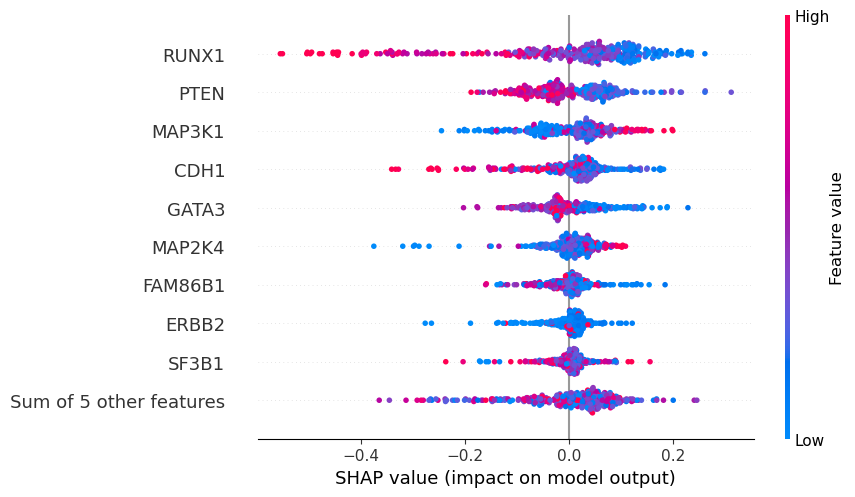

<Figure size 640x480 with 0 Axes>

In [10]:
shap.plots.beeswarm(shap_values)

# Save the plot with DPI = 1200
plt.savefig("shap_summary_plot.png", dpi=1200)
plt.show()



In [3]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/447.3 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 430.1/447.3 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
X.type

AttributeError: 'DataFrame' object has no attribute 'type'

In [4]:
# spark is from the previous example.
sc = spark.sparkContext

# A JSON dataset is pointed to by path.
# The path can be either a single text file or a directory storing text files
path = "Downloads/people.json"
peopleDF = spark.read.json(path)

In [5]:
peopleDF.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [6]:
peopleDF.createOrReplaceTempView("people")

# SQL statements can be run by using the sql methods provided by spark
teenagerNamesDF = spark.sql("SELECT name FROM people WHERE age BETWEEN 13 AND 19")
teenagerNamesDF.show()
# +------+
# |  name|
# +------+
# |Justin|
# +------+

# Alternatively, a DataFrame can be created for a JSON dataset represented by
# an RDD[String] storing one JSON object per string
jsonStrings = ['{"name":"Yin","address":{"city":"Columbus","state":"Ohio"}}']
otherPeopleRDD = sc.parallelize(jsonStrings)
otherPeople = spark.read.json(otherPeopleRDD)
otherPeople.show()

+------+
|  name|
+------+
|Justin|
+------+

+----------------+----+
|         address|name|
+----------------+----+
|{Columbus, Ohio}| Yin|
+----------------+----+



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# loading dataset

#read the features
x = read_csv('Documents/2d_PCA_All.arff.csv')

In [3]:
X = x.iloc[:,:2]
y=x.iloc[:,2:3]

In [8]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({'class': 1})


InvalidIndexError: (array([], dtype=int64), 0)

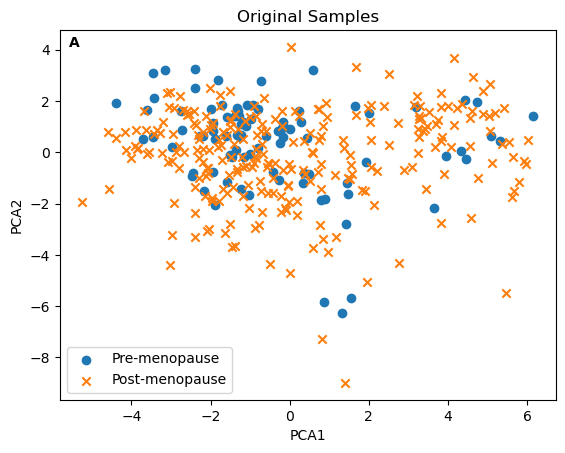

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Documents/2d_PCA_All.arff.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Specify column indices
column_index1 = 0  # Replace with the index of the first column
column_index2 = 1  # Replace with the index of the second column
class_label_index = 2  # Replace with the index of the class label column

# Separate data based on class label
class_0 = data[data.iloc[:, class_label_index] == 0]
class_1 = data[data.iloc[:, class_label_index] == 1]

# Plot the 2D points
plt.scatter(class_0.iloc[:, column_index1], class_0.iloc[:, column_index2], label='Pre-menopause', marker='o')
plt.scatter(class_1.iloc[:, column_index1], class_1.iloc[:, column_index2], label='Post-menopause', marker='x')

# Set labels and title
plt.xlabel(f'PCA1')
plt.ylabel(f'PCA2')
plt.title('Original Samples')
# Add text "A" at the top-left corner
plt.text(class_0.iloc[:, column_index1].min()-1.2, class_1.iloc[:, column_index2].max(), 'A', fontweight='bold')

# Show legend
plt.legend()

# Show the plot
plt.show()


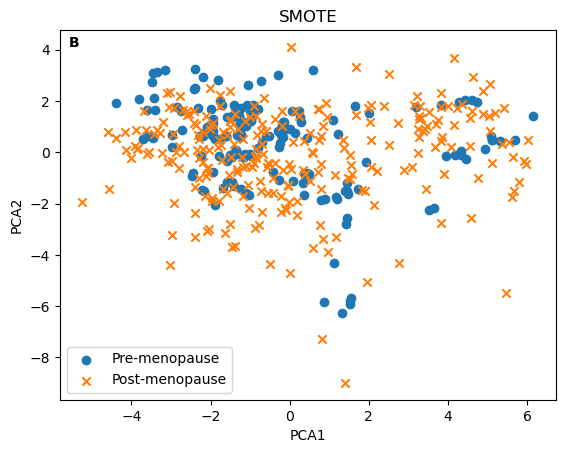

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Documents/2d_PCA_All_SMOTE.arff.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Specify column indices
column_index1 = 0  # Replace with the index of the first column
column_index2 = 1  # Replace with the index of the second column
class_label_index = 2  # Replace with the index of the class label column

# Separate data based on class label
class_0 = data[data.iloc[:, class_label_index] == 0]
class_1 = data[data.iloc[:, class_label_index] == 1]

# Plot the 2D points
plt.scatter(class_0.iloc[:, column_index1], class_0.iloc[:, column_index2], label='Pre-menopause', marker='o')
plt.scatter(class_1.iloc[:, column_index1], class_1.iloc[:, column_index2], label='Post-menopause', marker='x')

# Set labels and title
plt.xlabel(f'PCA1')
plt.ylabel(f'PCA2')
plt.title('SMOTE')
# Add text "A" at the top-left corner
plt.text(class_0.iloc[:, column_index1].min()-1.2, class_1.iloc[:, column_index2].max(), 'B', fontweight='bold')

# Show legend
plt.legend()

# Show the plot
plt.show()


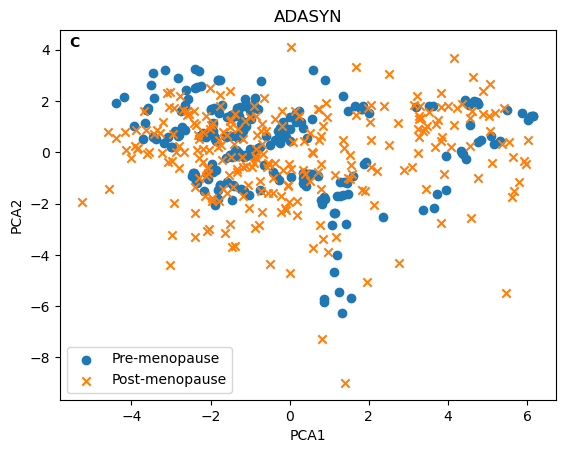

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Downloads/adasyn.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Specify column indices
column_index1 = 0  # Replace with the index of the first column
column_index2 = 1  # Replace with the index of the second column
class_label_index = 2  # Replace with the index of the class label column

# Separate data based on class label
class_0 = data[data.iloc[:, class_label_index] == 0]
class_1 = data[data.iloc[:, class_label_index] == 1]

# Plot the 2D points
plt.scatter(class_0.iloc[:, column_index1], class_0.iloc[:, column_index2], label='Pre-menopause', marker='o')
plt.scatter(class_1.iloc[:, column_index1], class_1.iloc[:, column_index2], label='Post-menopause', marker='x')

# Set labels and title
plt.xlabel(f'PCA1')
plt.ylabel(f'PCA2')
plt.title('ADASYN')
# Add text "A" at the top-left corner
plt.text(class_0.iloc[:, column_index1].min()-1.2, class_1.iloc[:, column_index2].max(), 'C', fontweight='bold')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [33]:
 pip install imbalanced-learn

In [ ]:
pip install scikit-learn==1.2.2
